In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']

data = pd.read_csv('G:/CDO/狗熊会机器学习/TASK4--刘嘉玲/Speed Dating Data.csv', encoding='gbk')
columns=['dec','gender','attr','sinc','intel','fun','amb','shar']
female = data.loc[data['gender']==0, columns]
male = data.loc[data['gender']==1, columns]


Bad key "text.kerning_factor" on line 4 in
E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# 任务一

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import roc_curve, auc 

## 女性随机森林模型 

In [3]:
forest_female = RandomForestClassifier(n_estimators=1000, random_state=1234, 
                                       n_jobs=-1)

# 丢弃缺失数据
female_discard_missing = female.loc[np.all(female.notnull(), axis=1), :]  
X_female = female_discard_missing[columns[2:]]
y_female = female_discard_missing['dec']
train_X_female, test_X_female, train_y_female, test_y_female = train_test_split(X_female, 
                                                                                y_female,
                                                                                train_size=0.75,
                                                                                random_state=1234,
                                                                                shuffle=True)

In [4]:
forest_female.fit(train_X_female, train_y_female)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

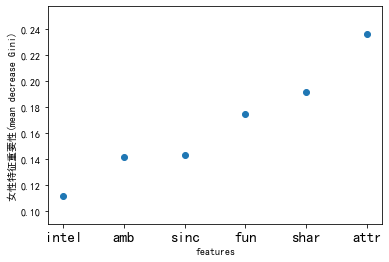

In [5]:
# 各特征的mean decrease impurity
female_importance = forest_female.feature_importances_
column_index = np.argsort(female_importance)  # 获取对应的列名
female_importance = sorted(female_importance)  # 从小到大排序
figure = plt.figure(1)

plt.scatter(np.arange(1, len(column_index)+1), np.sort(female_importance))
plt.xticks(np.arange(1, len(column_index)+1), female.columns[2:][column_index], size=15)
plt.xlabel('features')
plt.ylabel('女性特征重要性(mean decrease Gini)')
plt.show()

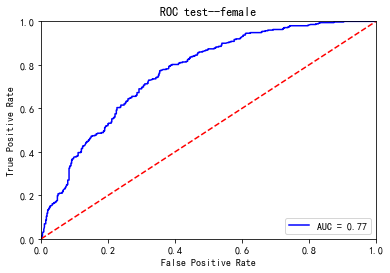

In [6]:
prob_y_female = forest_female.predict_proba(test_X_female)
fpr, tpr, _ = roc_curve(test_y_female, prob_y_female[:, 1])
roc_auc = auc(fpr, tpr)

figure = plt.figure(2)
plt.title('ROC test--female')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

## 男性随机森林模型

In [7]:
forest_male = RandomForestClassifier(n_estimators=1000, random_state=1234, 
                                       n_jobs=-1)

# 丢弃缺失数据
male_discard_missing = male.loc[np.all(male.notnull(), axis=1), :]  
X_male = male_discard_missing[columns[2:]]
y_male = male_discard_missing['dec']
train_X_male, test_X_male, train_y_male, test_y_male = train_test_split(X_male, 
                                                                                y_male,
                                                                                train_size=0.75,
                                                                                random_state=1234,
                                                                                shuffle=True) 

In [8]:
forest_male.fit(train_X_male, train_y_male) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

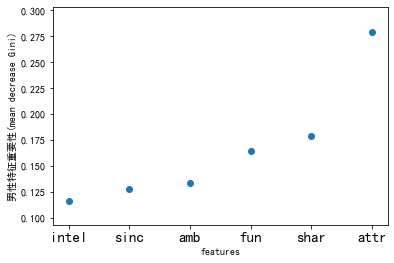

In [9]:
# 各特征的mean decrease impurity
male_importance = forest_male.feature_importances_
column_index = np.argsort(male_importance)  # 获取对应的列名
male_importance = sorted(male_importance)  # 从小到大排序
figure = plt.figure(1)

plt.scatter(np.arange(1, len(column_index)+1), np.sort(male_importance))
plt.xticks(np.arange(1, len(column_index)+1), male.columns[2:][column_index], size=15)
plt.xlabel('features')
plt.ylabel('男性特征重要性(mean decrease Gini)')
plt.show()

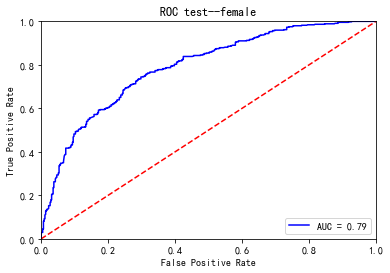

In [10]:
prob_y_male = forest_male.predict_proba(test_X_male)
fpr, tpr, _ = roc_curve(test_y_male, prob_y_male[:, 1])
roc_auc = auc(fpr, tpr)

figure = plt.figure(2)
plt.title('ROC test--female')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()